In [14]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import scipy



In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
)
train_generator = train_datagen.flow_from_directory(
    'MasterDatasetSplited/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    )


Found 50592 images belonging to 30 classes.


In [16]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Cherry_Powdery_mildew': 4,
 'Cherry__healthy': 5,
 'Corn_(maize)___Common_rust_': 6,
 'Corn_(maize)___healthy': 7,
 'Grape___Black_rot': 8,
 'Grape___Esca_(Black_Measles)': 9,
 'Grape___healthy': 10,
 'Peach___Bacterial_spot': 11,
 'Peach___healthy': 12,
 'Pepper__bell___Bacterial_spot': 13,
 'Pepper__bell___healthy': 14,
 'Potato___Early_blight': 15,
 'Potato___Late_blight': 16,
 'Potato___healthy': 17,
 'Strawberry___Leaf_scorch': 18,
 'Strawberry___healthy': 19,
 'Tomato_Bacterial_spot': 20,
 'Tomato_Early_blight': 21,
 'Tomato_Late_blight': 22,
 'Tomato_Leaf_Mold': 23,
 'Tomato_Septoria_leaf_spot': 24,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 25,
 'Tomato__Target_Spot': 26,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 27,
 'Tomato__Tomato_mosaic_virus': 28,
 'Tomato_healthy': 29}

In [17]:
class_names = list(train_generator.class_indices.keys())
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Cherry_Powdery_mildew',
 'Cherry__healthy',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [18]:
for image_batch, label_batch in train_generator:
    print(image_batch.shape)
    break



(32, 256, 256, 3)


In [19]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    )

validation_generator = validation_datagen.flow_from_directory(
    'MasterDatasetSplited/val',
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse'
)




Found 7216 images belonging to 30 classes.


In [20]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    )
test_generator = test_datagen.flow_from_directory(
    'MasterDatasetSplited/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse'
)




Found 14484 images belonging to 30 classes.


In [21]:
input_shape = (256, 256, 3)
num_classes = 30

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
model.build(input_shape=input_shape)

In [22]:
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 64)      

In [24]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])

In [25]:
7216/32 

225.5

In [26]:
history = model.fit(
    train_generator,
    steps_per_epoch=1581,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=225,
    verbose=1,
    epochs=25
    )

Epoch 1/25
1581/1581 [==============================] - 499s 315ms/step - loss: 1.3292 - accuracy: 0.6045 - val_loss: 0.7489 - val_accuracy: 0.7689
Epoch 2/25
1581/1581 [==============================] - 291s 184ms/step - loss: 0.4331 - accuracy: 0.8622 - val_loss: 0.2789 - val_accuracy: 0.9075
Epoch 3/25
1581/1581 [==============================] - 282s 178ms/step - loss: 0.2964 - accuracy: 0.9027 - val_loss: 0.2703 - val_accuracy: 0.9129
Epoch 4/25
1581/1581 [==============================] - 281s 177ms/step - loss: 0.2379 - accuracy: 0.9225 - val_loss: 0.2379 - val_accuracy: 0.9253
Epoch 5/25
1581/1581 [==============================] - 281s 178ms/step - loss: 0.1999 - accuracy: 0.9345 - val_loss: 0.2341 - val_accuracy: 0.9267
Epoch 6/25
1581/1581 [==============================] - 280s 177ms/step - loss: 0.1744 - accuracy: 0.9418 - val_loss: 0.2556 - val_accuracy: 0.9200
Epoch 7/25
1581/1581 [==============================] - 278s 176ms/step - loss: 0.1577 - accuracy: 0.9472 - val_

In [27]:
scores = model.evaluate(test_generator)

453/453 [==============================] - 79s 174ms/step - loss: 0.0912 - accuracy: 0.9784


In [28]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 1581}

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
history.history['accuracy']

[0.6045421957969666,
 0.8621916770935059,
 0.9026723504066467,
 0.9224581122398376,
 0.9344560503959656,
 0.9418089985847473,
 0.9471655488014221,
 0.9552696347236633,
 0.9582542777061462,
 0.9618714451789856,
 0.9637689590454102,
 0.9657257795333862,
 0.9693430066108704,
 0.9684337377548218,
 0.9702522158622742,
 0.9728810787200928,
 0.9721300005912781,
 0.9740868210792542,
 0.9739484786987305,
 0.9733356833457947,
 0.9761227369308472,
 0.9773284196853638,
 0.9761029481887817,
 0.9791864156723022,
 0.9776248931884766]

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

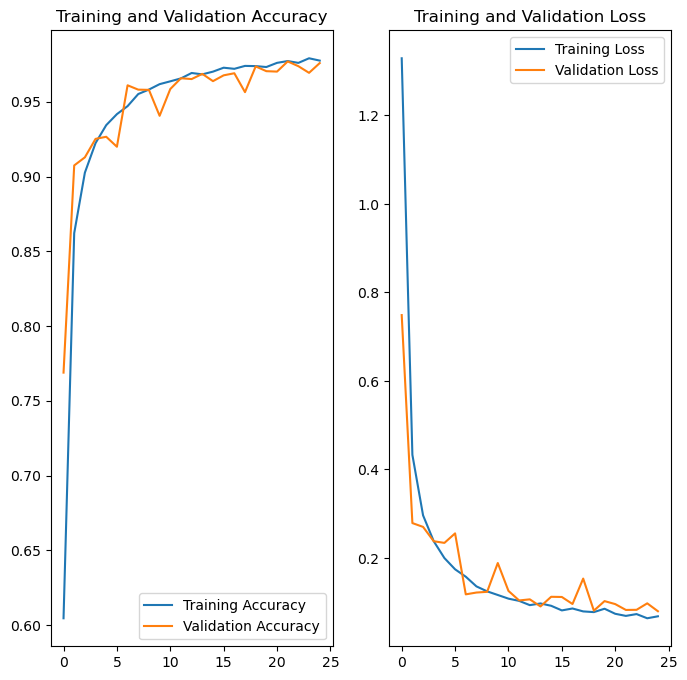

In [32]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(25), acc, label='Training Accuracy')
plt.plot(range(25), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(25), loss, label='Training Loss')
plt.plot(range(25), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
Actual lable:  Grape___Black_rot
1/1 [==============================] - 0s 87ms/step
Predicted lable:  Grape___Black_rot


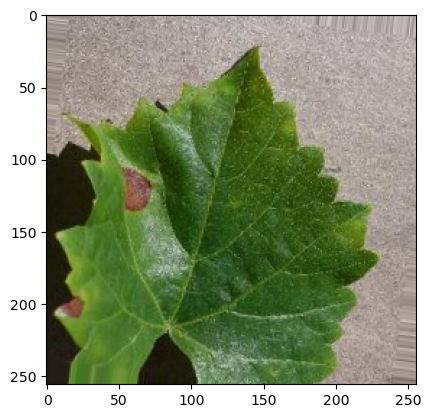

In [33]:
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_lable = int(label_batch[0])

    print("First image to predict")
    plt.imshow(first_image)
    print("Actual lable: ", class_names[first_lable])
    #print(class_names[first_lable])

    batch_prediction = model.predict(image_batch)
    print("Predicted lable: ", class_names[np.argmax(batch_prediction[0])])
    break

In [34]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

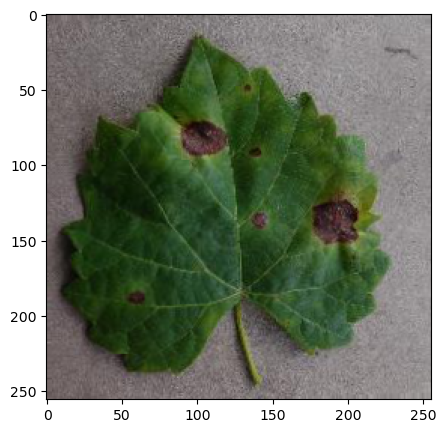

In [37]:
plt.figure(figsize=(17,17))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[labels[i]]


        plt.title(f"Actual class: {actual_class}, \n Predicted class: {predicted_class}, \n Confidence: {confidence}%")
        plt.axis("off")

In [38]:
model_version = "Master_Model_v1"
model.save(f"../Models/{model_version}")
model.save(f"../Models/{model_version}.h5")


INFO:tensorflow:Assets written to: ../Models/Master_Model_v1\assets


INFO:tensorflow:Assets written to: ../Models/Master_Model_v1\assets
